# Scikit-learn Introduction

Scikit-learn is a huge library for defining machine learning algorithms, fitting them to data, and evaluating the model performance.

A subset of the model classes included in scikit-learn:

- Clustering: for grouping unlabeled data such as KMeans.
- Manifold Learning: For summarizing and depicting complex multi-dimensional data.
- Supervised Models: a vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- Dimensionality Reduction: for reducing the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- Ensemble methods: for combining the predictions of multiple supervised models.

Tools for fitting and evaluting models:

- Cross Validation: for estimating the performance of supervised models on unseen data.
- Feature extraction: for defining attributes in image and text data.
- Feature selection: for identifying meaningful attributes from which to create supervised models.
- Parameter Tuning: for getting the most out of supervised models.
- Datasets: for test datasets and for generating datasets with specific properties for investigating model behavior.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Example: fitting MeanShift clustering algorithm

In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs


In [3]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

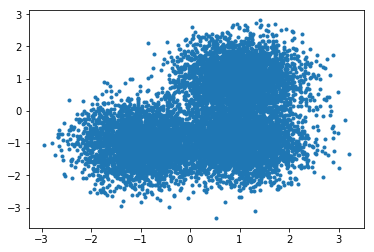

In [4]:
# visualize the sample data
plt.plot(X[:, 0], X[:, 1], '.')
plt.show()

In [5]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


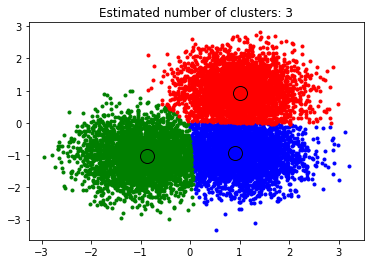

In [6]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Example: fitting the Classification and Regression Tress (CART) decision tree algorithm 

In [7]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# load the iris datasets
dataset = datasets.load_iris()

# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Use the model to make predictions and evaluate the predictions:

In [8]:
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


## Example: Isotonic regresssion

Isotonic regression does not assume a particular function (linear, quadratic, etc.) for the target function, only that the function must monotonically increase. This example compares isotonic regression to a linear regression model.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

# generate random data
n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log(1 + np.arange(n))

In [10]:
# fit the regression models

ir = IsotonicRegression()
isotonic_regression_predictions = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression
linear_regression_predictions = lr.predict(x[:, np.newaxis])

In [11]:
# evaluate the models

from sklearn.metrics import r2_score

print("Isotonic regression R^2:", r2_score(y, isotonic_regression_predictions))
print("Linear regression R^2:", r2_score(y, linear_regression_predictions))

Isotonic regression R^2: 0.761241381122
Linear regression R^2: 0.559325058827


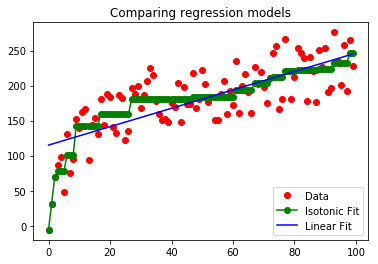

In [12]:
# plot the results

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, isotonic_regression_predictions, 'g.-', markersize=12)
plt.plot(x, linear_regression_predictions, 'b-')
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Comparing regression models')
plt.show()

## Other information:

- Overview: http://scikit-learn.org/stable/
- More examples: http://scikit-learn.org/stable/auto_examples/index.html